In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import tensorflow as tf
import os

In [2]:
import numpy as np

In [3]:
np.expand_dims??

In [4]:
df = pd.read_csv('/content/train.csv', engine='python', on_bad_lines='skip')

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
df[df.columns[2:]].iloc[0]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 0, dtype: int64

In [8]:
df.iloc[1]['comment_text']

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [9]:
df[df.columns[2:]].iloc[1]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 1, dtype: int64

In [10]:
df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [11]:
df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

# Preprocessing

In [12]:
from tensorflow.keras.layers import TextVectorization

In [13]:
x=df['comment_text']
y=df[df.columns[2:]].values

In [14]:
x

0       Explanation\nWhy the edits made under my usern...
1       D'aww! He matches this background colour I'm s...
2       Hey man, I'm really not trying to edit war. It...
3       "\nMore\nI can't make any real suggestions on ...
4       You, sir, are my hero. Any chance you remember...
                              ...                        
7163    "\n\n Please do not vandalize pages, as you di...
7164    "\n I don't know the context, but you might fi...
7165    Your source come from a Greek anti Albanian we...
7166    There are no third party sources. And the ones...
7167    Good idea. Let's continue the discussion at Ta...
Name: comment_text, Length: 7168, dtype: object

In [15]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [16]:
max_features=200000  #number of words in vocab

In [17]:
vectorization=TextVectorization(max_tokens=max_features,
                                output_sequence_length=1800,  # defining the length of words in each comments...
                                output_mode='int')

## Texxt vectorization also removes punctuations

In [18]:
vectorization.adapt(x.values)

In [19]:
vectorization("Hello How are you")[:4]

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([318,  73,  19,   8])>

In [20]:
type(x)

pandas.core.series.Series

In [21]:
type(x.values)

numpy.ndarray

In [22]:
vectorization.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'i',
 'you',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'are',
 'have',
 'with',
 'your',
 'if',
 'was',
 'article',
 'or',
 'but',
 'page',
 'my',
 'an',
 'do',
 'by',
 'from',
 'at',
 'me',
 'about',
 'so',
 'what',
 'can',
 'wikipedia',
 'there',
 'all',
 'has',
 'will',
 'would',
 'like',
 'its',
 'one',
 'no',
 'talk',
 'just',
 'please',
 'they',
 'he',
 'any',
 'been',
 'dont',
 'which',
 'we',
 'his',
 'other',
 'more',
 'here',
 'see',
 'should',
 'some',
 'who',
 'also',
 'im',
 'because',
 'know',
 'think',
 'how',
 'then',
 'up',
 'why',
 'edit',
 'were',
 'out',
 'am',
 'people',
 'only',
 'articles',
 'fuck',
 'ass',
 'use',
 'sex',
 'go',
 'did',
 'now',
 'when',
 'their',
 'time',
 'being',
 'may',
 'than',
 'get',
 'thanks',
 'even',
 'make',
 'hate',
 'them',
 'had',
 'information',
 'good',
 'could',
 'well',
 'very',
 'first',
 'deletion',
 'sources',
 'way',
 'want',
 'yourself',


In [23]:
vectorized_text=vectorization(x.values)

In [24]:
len(x)

7168

In [25]:
vectorized_text

<tf.Tensor: shape=(7168, 1800), dtype=int64, numpy=
array([[  688,    76,     2, ...,     0,     0,     0],
       [29691,    54,  1912, ...,     0,     0,     0],
       [  507,   434,    69, ...,     0,     0,     0],
       ...,
       [   22,   132,   215, ...,     0,     0,     0],
       [   41,    19,    49, ...,     0,     0,     0],
       [  105,   366,   547, ...,     0,     0,     0]])>

#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file

In [26]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [27]:
dataset.as_numpy_iterator().next()

(array([[ 2404,  2214,   183, ...,     0,     0,     0],
        [10329,  4402,    25, ...,     0,     0,     0],
        [  335,  6919,    11, ...,     0,     0,     0],
        ...,
        [  144,     8,    13, ...,     0,     0,     0],
        [    7,    57,    72, ...,     0,     0,     0],
        [ 5698,     8,    20, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [28]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [29]:
batch_x.shape

(16, 1800)

In [30]:
batch_y.shape

(16, 6)

In [31]:
len(dataset)

448

In [32]:
len(dataset)*.7

313.59999999999997

In [33]:
len(dataset)*.2

89.60000000000001

In [34]:
len(dataset)*.1

44.800000000000004

In [35]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))  # skipping 70 and taking 20%
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [36]:
train_generator=train.as_numpy_iterator()

In [37]:
train_generator.next()

(array([[31194, 19021,  1261, ...,     0,     0,     0],
        [   52,    31,    15, ...,     0,     0,     0],
        [  235,    23,     2, ...,     0,     0,     0],
        ...,
        [   11,   718,  1411, ...,     0,     0,     0],
        [31534,   139,  9952, ...,     0,     0,     0],
        [   89,     8,  5810, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

## Create Sequential Model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Bidirectional,Dropout,Dense,Embedding

In [39]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(max_features+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid'))

In [40]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [42]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
313/313 [==============================] - 76s 226ms/step - loss: 0.1441 - val_loss: 0.0889
Epoch 2/5
313/313 [==============================] - 52s 166ms/step - loss: 0.0726 - val_loss: 0.0596
Epoch 3/5
313/313 [==============================] - 43s 137ms/step - loss: 0.0530 - val_loss: 0.0448
Epoch 4/5
313/313 [==============================] - 39s 125ms/step - loss: 0.0437 - val_loss: 0.0372
Epoch 5/5
313/313 [==============================] - 37s 118ms/step - loss: 0.0376 - val_loss: 0.0366


In [43]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

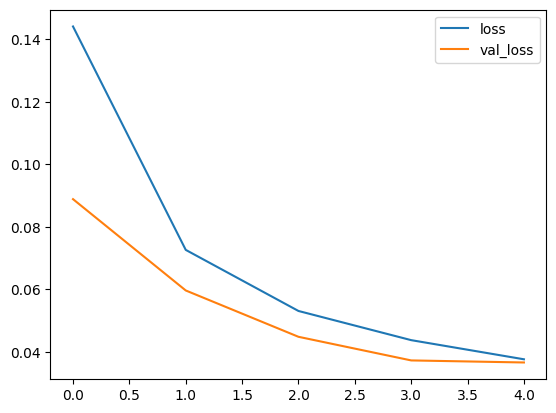

In [44]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## Predictions

In [45]:
input_text = vectorization('You freaking suck! I am going to hit you.')

In [46]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


In [47]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [48]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [49]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 99ms/step


array([[1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [50]:
res.shape

(1, 6)

## Evaluating

In [51]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [53]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 58ms/step


In [54]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8627451062202454, Recall:0.7951807379722595, Accuracy:0.3636363744735718


 ## Test and Gradio

In [55]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.8 M

In [56]:
import gradio as gr

In [57]:
model.save('toxicity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
model=tf.keras.models.load_model('/content/toxicity.h5')

In [59]:
input_str=vectorization("hey I freaking hate you!")

In [60]:
res=model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 684ms/step


In [61]:
res

array([[0.9865306 , 0.31088817, 0.9225461 , 0.08678842, 0.78026325,
        0.18508445]], dtype=float32)

In [62]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [63]:
def score_comment(comment):
    vectorized_comment = vectorization([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [64]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [65]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cc6f025f29e249c2b5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
